Text(0.5, 1.0, 'True image')

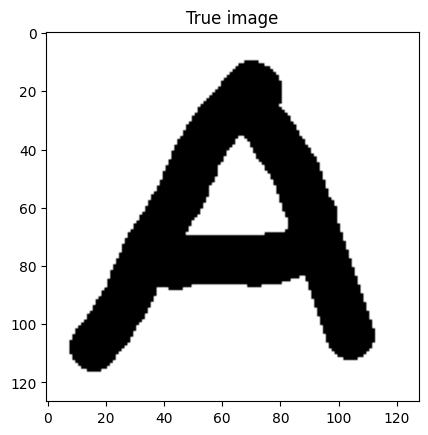

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

img = pd.read_csv("letterA.csv").to_numpy()

plt.figure()
plt.imshow(img,cmap='Greys')
plt.title("True image")

Text(0.5, 1.0, 'noisy image, iteration = 0')

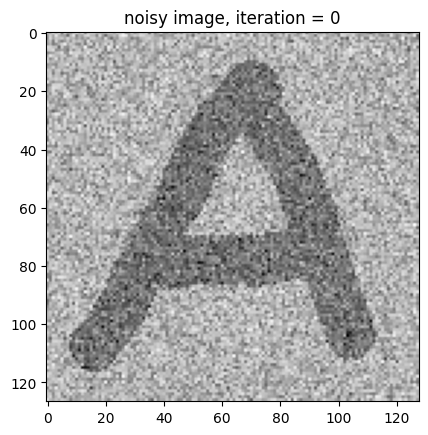

In [2]:
# Add Noise

height,width = img.shape
sigma = 1
noisy_img = img + sigma*np.random.randn(height, width)
plt.figure()
plt.imshow(noisy_img, cmap='Greys')
plt.title('noisy image, iteration = 0')

In [3]:
def ising(noisy_image, image, h, beta, eta, iteration_count):
    copy = np.copy(noisy_image)
    N = np.size(copy,0)
    M = np.size(copy,1)
    for n in range(iteration_count):
        for i in range(N):
            for j in range(M):
                E = 0
                if i > 0:
                    E += copy[i-1,j]
                if i < N-1:
                    E += copy[i+1,j]
                if j > 0:
                    E += copy[i,j-1]
                if j < M-1:
                    E += copy[i,j+1]
                E_pos = h - beta*E - eta*noisy_image[i,j]
                E_neg = -(h - beta*E - eta*noisy_image[i,j])
                if E_pos < E_neg:
                    copy[i,j] = 1
                else:
                    copy[i,j] = -1
        NMSE = 1/np.sum(image**2) * np.sum((copy-image)**2) 
        print("Total iteration count:", n+1, end="\r")
    return copy, NMSE

Text(0.5, 1.0, 'noisy image, iteration = 20')

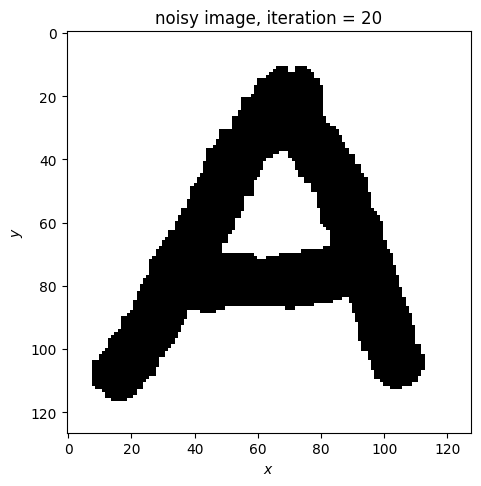

In [9]:
beta = 1
eta = 0.1
h = 0
n_its = 50

image, NMSE = ising(noisy_img, img, h, beta, eta, n_its)


fig = plt.figure()
plt.xlabel('$x$')
plt.ylabel('$y$')
fig.tight_layout()
plt.imshow(image, cmap='Greys')
plt.title('noisy image, iteration = 20')

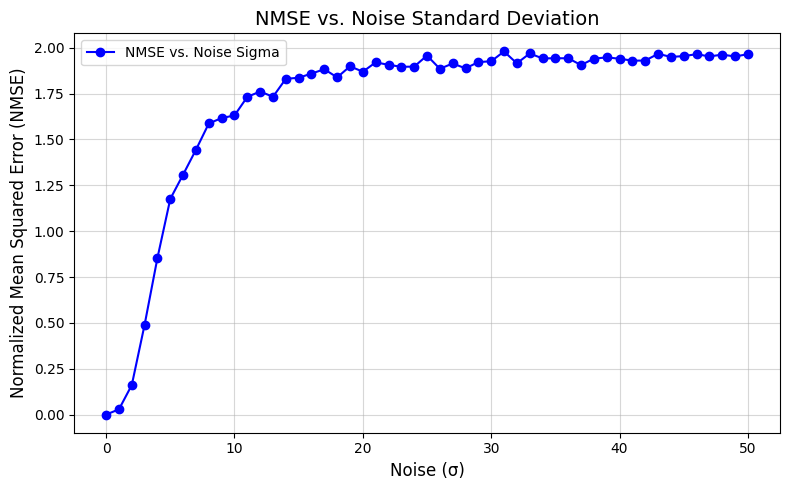

In [5]:
# Comparison for NMSE against sigma

height,width = img.shape
sigmas = np.linspace(0,50,51)
NMSEs = []

beta = 2
eta = 1
h = 0
n_its = 15

for sigma in sigmas:
    noisy_img = img + sigma*np.random.randn(height, width)
    copy, NMSE = ising(noisy_img, img, h, beta, eta, n_its)
    NMSEs.append(NMSE)

plt.figure(figsize=(8, 5))
plt.plot(sigmas, NMSEs, label="NMSE vs. Noise Sigma", marker='o', color='b')
plt.title("NMSE vs. Noise Standard Deviation", fontsize=14)
plt.xlabel("Noise (σ)", fontsize=12)
plt.ylabel("Normalized Mean Squared Error (NMSE)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

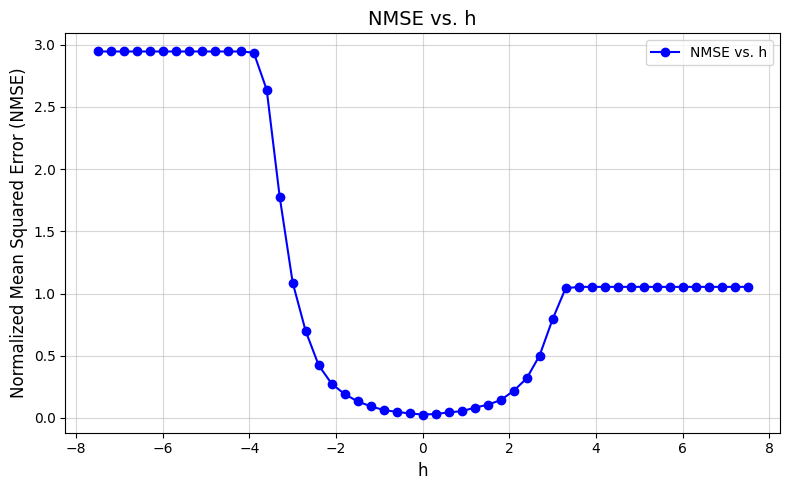

In [6]:
# Comparision for NMSE against h

height,width = img.shape
sigma = 1
noisy_img = img + sigma*np.random.randn(height, width)
NMSEs = []

beta = 2
eta = 1
hs = np.linspace(-7.5, 7.5, 51)
n_its = 15

for h in hs:
    x, NMSE = ising(noisy_img, img, h, beta, eta, n_its)
    NMSEs.append(NMSE)

plt.figure(figsize=(8, 5))
plt.plot(hs, NMSEs, label="NMSE vs. h", marker='o', color='b')
plt.title("NMSE vs. h", fontsize=14)
plt.xlabel("h", fontsize=12)
plt.ylabel("Normalized Mean Squared Error (NMSE)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

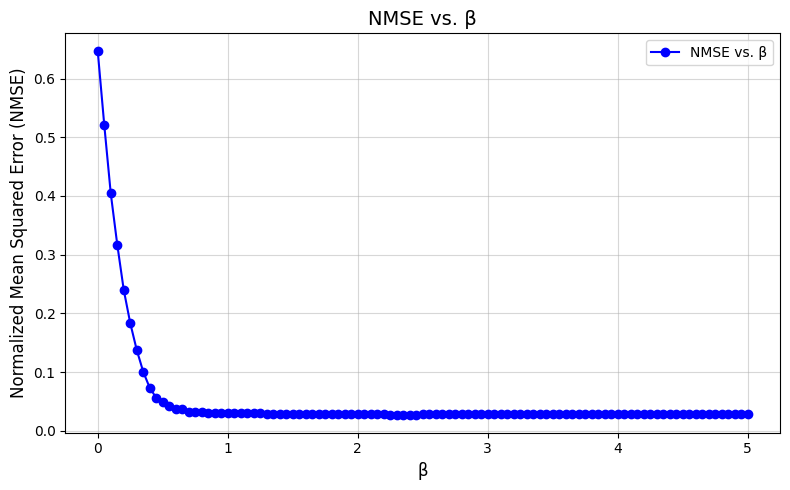

In [7]:
# Comparision for NMSE against beta

height,width = img.shape
sigma = 1
noisy_img = img + sigma*np.random.randn(height, width)
NMSEs = []

betas = np.linspace(0, 5, 101)
eta = 1
h = 0
n_its = 15

for beta in betas:
    x, NMSE = ising(noisy_img, img, h, beta, eta, n_its)
    NMSEs.append(NMSE)

plt.figure(figsize=(8, 5))
plt.plot(betas, NMSEs, label="NMSE vs. β", marker='o', color='b')
plt.title("NMSE vs. β", fontsize=14)
plt.xlabel("β", fontsize=12)
plt.ylabel("Normalized Mean Squared Error (NMSE)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

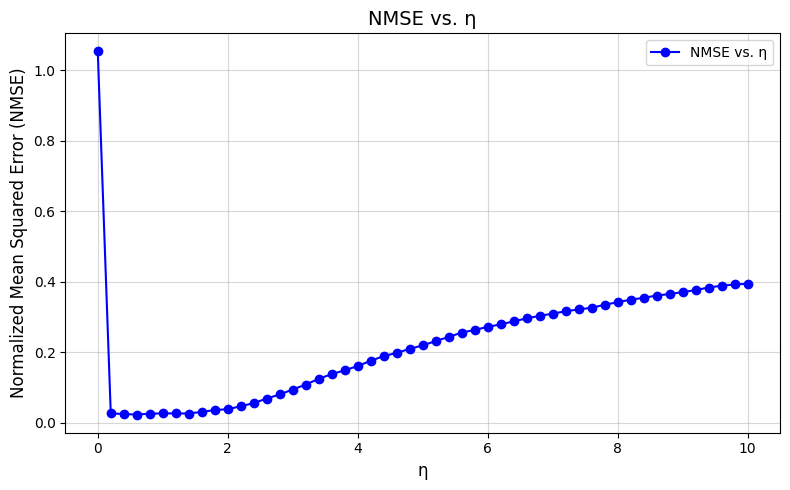

In [10]:
# Comparision for NMSE against eta

height,width = img.shape
sigma = 1
noisy_img = img + sigma*np.random.randn(height, width)
NMSEs = []

betas = 2
etas = np.linspace(0, 10, 51)
h = 0
n_its = 15

for eta in etas:
    x, NMSE = ising(noisy_img, img, h, beta, eta, n_its)
    NMSEs.append(NMSE)

plt.figure(figsize=(8, 5))
plt.plot(etas, NMSEs, label="NMSE vs. η", marker='o', color='b')
plt.title("NMSE vs. η", fontsize=14)
plt.xlabel("η", fontsize=12)
plt.ylabel("Normalized Mean Squared Error (NMSE)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()